In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
from scipy.stats import linregress
from statistics import mean

In [2]:
ls

1533148642_test.csv
1533148642_train.csv
HackDay2.ipynb
My_Prediction.csv
README.md
data_description.txt*
house-prices-advanced-regression-techniques/
house-prices-advanced-regression-techniques.zip
sample_submission.csv*
sols/


In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
df_test = pd.read_csv("1533148642_test.csv")

In [5]:
df_test.shape

(1459, 80)

In [6]:
df_train = pd.read_csv("1533148642_train.csv")

In [7]:
df_train.shape

(1460, 81)

In [8]:
df_train['Id'].head(-10)

0          1
1          2
2          3
3          4
4          5
        ... 
1445    1446
1446    1447
1447    1448
1448    1449
1449    1450
Name: Id, Length: 1450, dtype: int64

In [9]:
df_test['Id'].head(-10)

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1444    2905
1445    2906
1446    2907
1447    2908
1448    2909
Name: Id, Length: 1449, dtype: int64

In [10]:
Trainingdatasize = df_train.shape[0]

In [11]:
Testdatasize = df_test.shape[0]

In [12]:
df = pd.concat([df_train, df_test], ignore_index=True).reset_index(drop = True)

In [13]:
df[df.duplicated() ==  True]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold


In [14]:
abs(df.corr()['SalePrice'].sort_values(ascending = False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2       0.011378
BsmtHalfBath     0.016844
MiscVal          0.021190
Id               0.021917
LowQualFinSF     0.025606
YrSold           0.028923
OverallCond      0.077856
MSSubClass       0.084284
EnclosedPorch    0.128578
KitchenAbvGr     0.135907
Name: SalePr

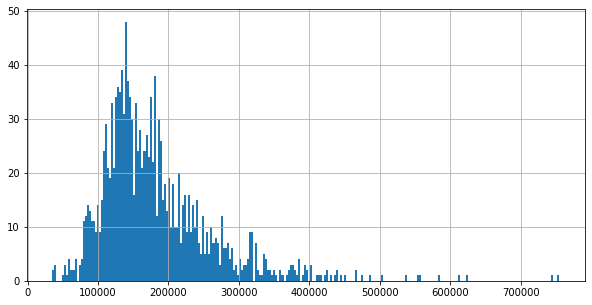

In [15]:
df['SalePrice'].hist(bins=250, figsize=(10,5))

In [16]:
df['SalePrice'] = np.log(df['SalePrice'])

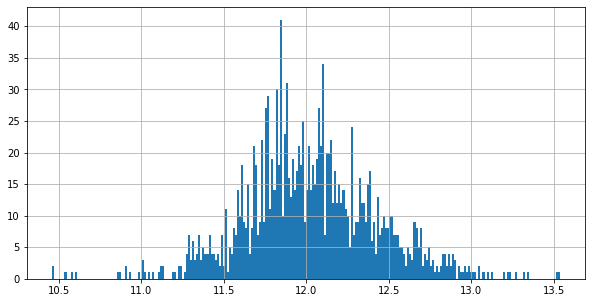

In [17]:
df['SalePrice'].hist(bins=250, figsize=(10,5))

In [18]:
def getline(x, y, name_x, name_y):
    
    m, b, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    y_pred = m*x+b
    
    plt.scatter(x, y)
    plt.plot(x, y_pred, 'r')
    plt.legend(['($r^2=$ {:.2f})'.format(r_value), 'Data'], loc='best')
    plt.ylabel(name_y, fontsize=13)
    plt.xlabel(name_x, fontsize=13)
    plt.title(name_x +' vs '+ name_y)
    

In [19]:
def cutoffgreater(df_in, elem, cutoff):
    
    df_out = df_in[df_in[elem]<cutoff]
    NewTrainingdatasize = df_out.shape[0]
    
    return df_out, NewTrainingdatasize

In [20]:
def plotcorrall(df_in):
    
    df1temp = df_in[:Trainingdatasize].select_dtypes(exclude=['object'])
    for elem in df1temp:
        plt.figure(figsize = (5,5))
        getline(df1temp[elem], df1temp['SalePrice'], str(elem), 'SalePrice')
    

In [21]:
def plotcorr(df_in, elem):

    df1temp = df_in[:Trainingdatasize].select_dtypes(exclude=['object'])
    plt.figure(figsize = (4,4))
    getline(df1temp[elem], df1temp['SalePrice'], str(elem), 'SalePrice')
    plt.figure(figsize = (4,4))
    df1temp[elem].hist(bins=100)
    plt.xlabel(elem)
    plt.ylabel('Counts')


In [22]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].median())
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].median())
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(df['BsmtFullBath'].median())
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(df['BsmtHalfBath'].median())
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(df['BsmtUnfSF'].median())
df['GarageArea'] = df['GarageArea'].fillna(df['GarageArea'].median())
df['GarageCars'] = df['GarageCars'].fillna(df['GarageCars'].median())
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].median())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
df['SalePrice'] = df['SalePrice'].fillna(df['SalePrice'].median())

In [23]:
df_train2 = df.iloc[:Trainingdatasize]

In [24]:
df_train2.shape

(1460, 81)

In [25]:
df_test2 = df.iloc[-Testdatasize:]

In [26]:
df_test2.shape

(1459, 81)

In [27]:
df_test2['Id'].head(-10)

1460    1461
1461    1462
1462    1463
1463    1464
1464    1465
        ... 
2904    2905
2905    2906
2906    2907
2907    2908
2908    2909
Name: Id, Length: 1449, dtype: int64

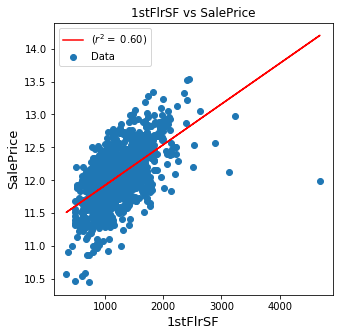

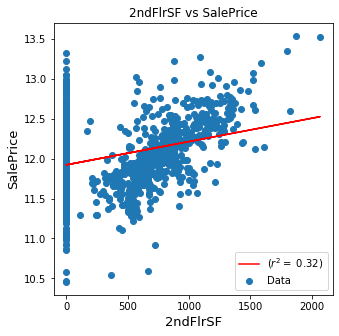

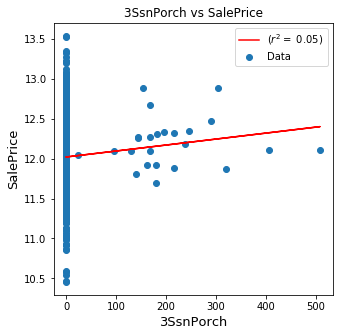

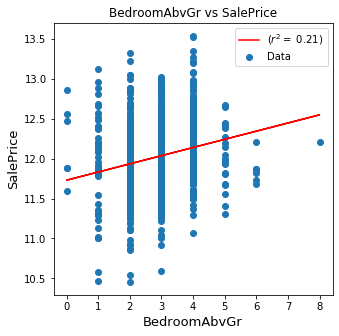

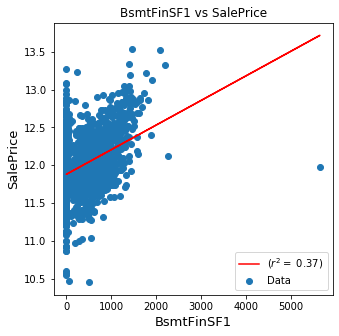

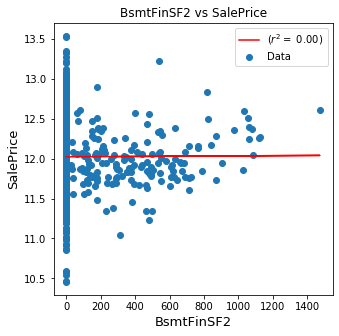

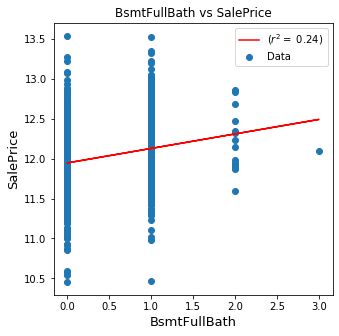

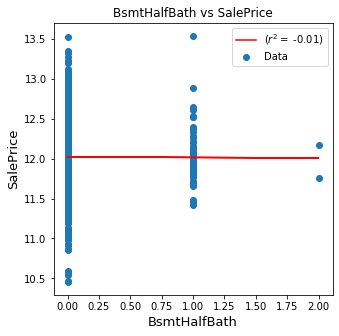

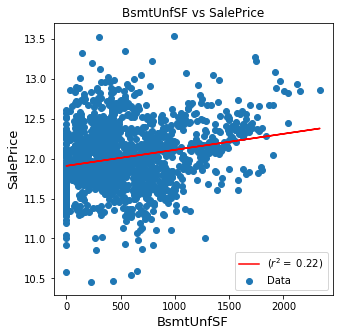

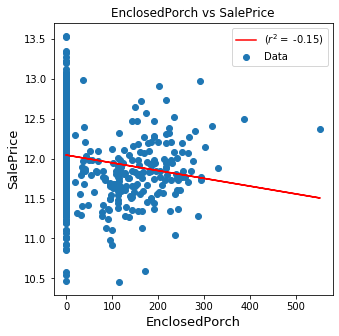

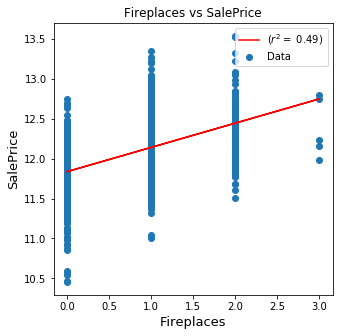

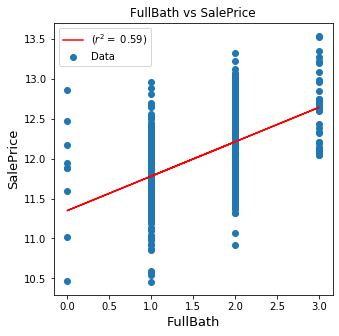

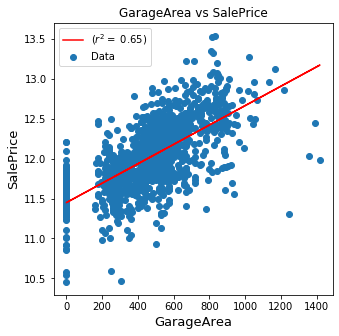

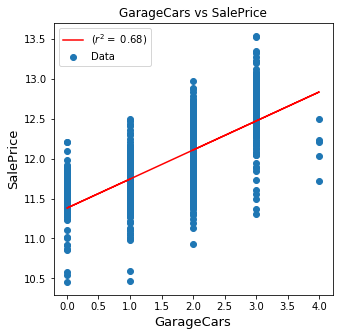

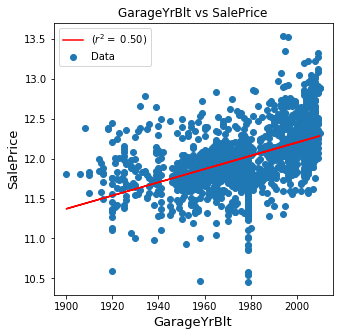

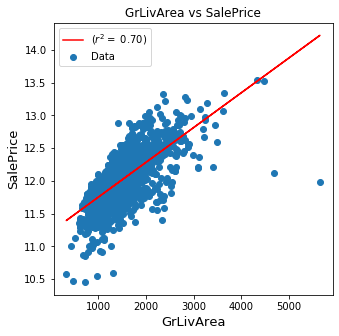

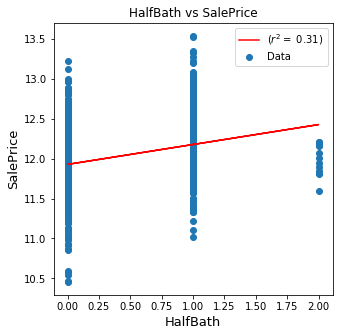

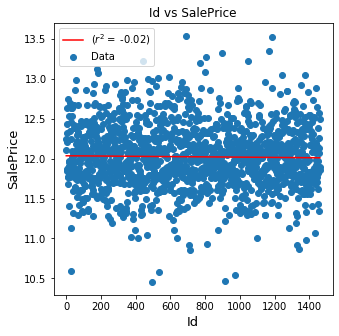

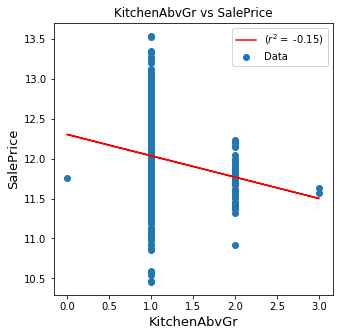

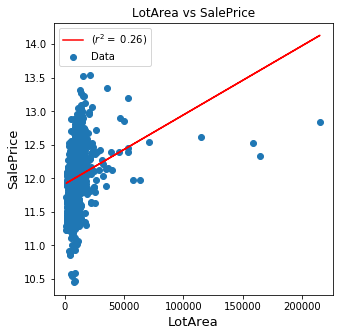

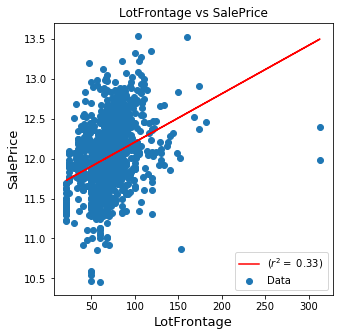

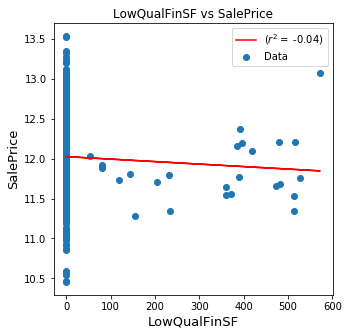

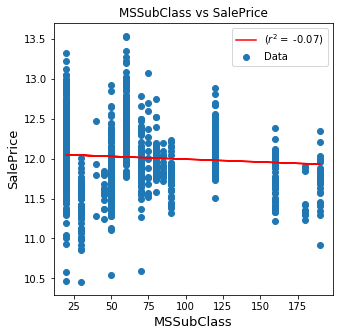

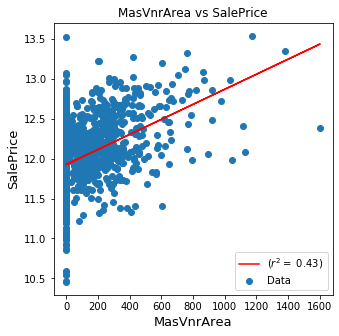

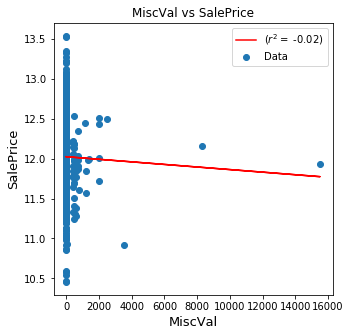

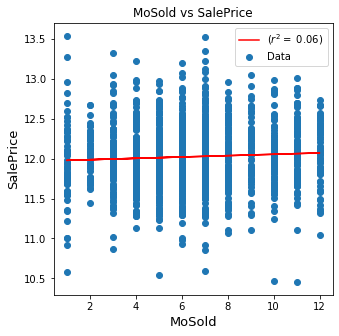

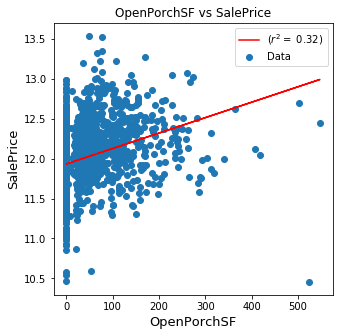

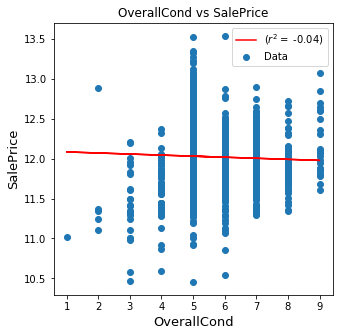

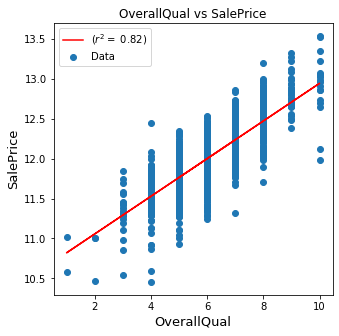

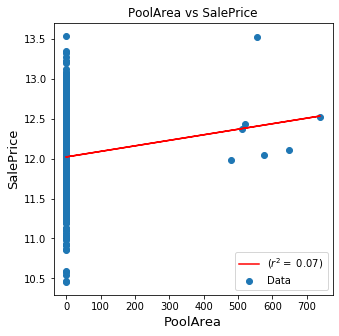

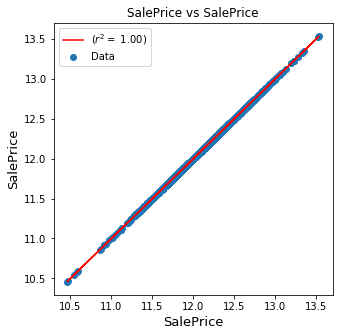

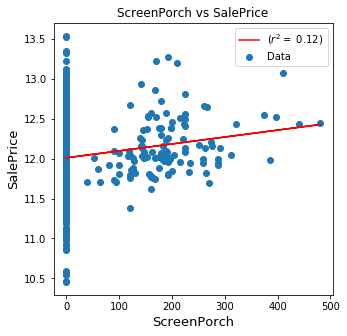

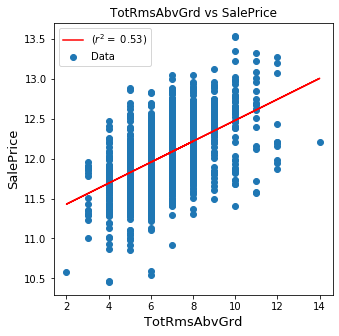

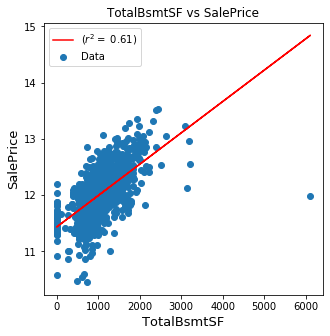

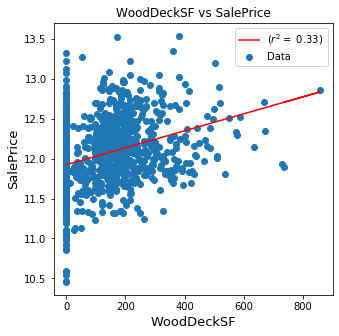

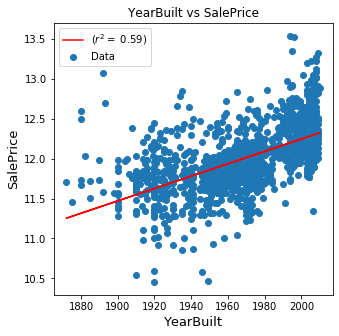

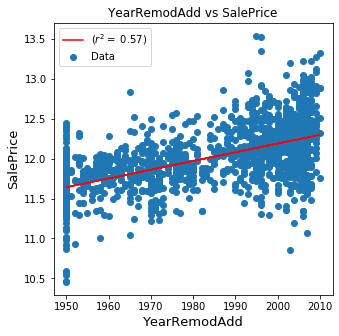

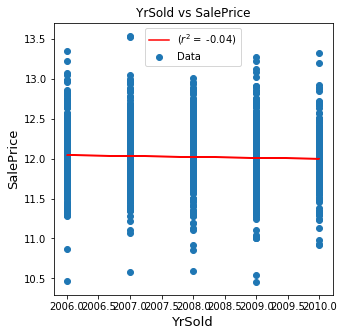

In [28]:
plotcorrall(df_train2)

### 1stFlrSF

In [29]:
df_train2, Trainingdatasize = cutoffgreater(df_train2, '1stFlrSF', 3000)
df_train2['1stFlrSF'] = df_train2['1stFlrSF'].apply(lambda x:np.log(x))
df_test2['1stFlrSF'] = df_test2['1stFlrSF'].apply(lambda x:np.log(x))

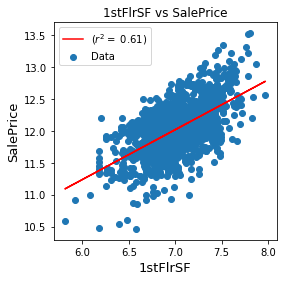

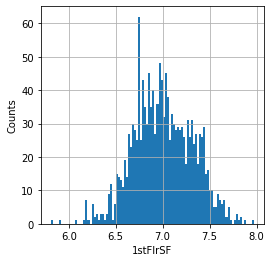

In [30]:
plotcorr(df_train2, '1stFlrSF')

###  BsmtFinSF1


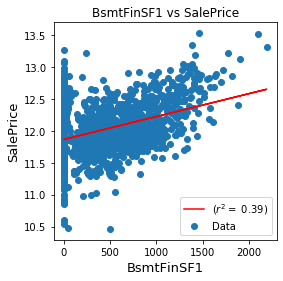

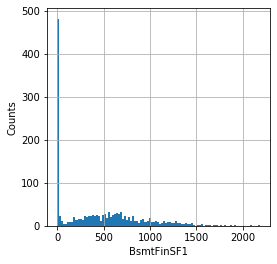

In [31]:
df_train2, Trainingdatasize = cutoffgreater(df_train2, 'BsmtFinSF1', 5000)
plotcorr(df_train2, 'BsmtFinSF1')

### GarageArea

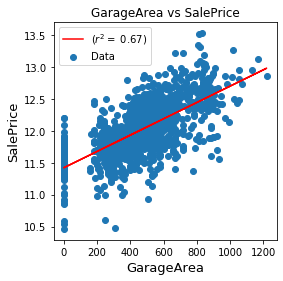

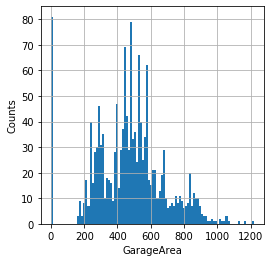

In [32]:
df_train2, Trainingdatasize = cutoffgreater(df_train2, 'GarageArea', 1230)
plotcorr(df_train2, 'GarageArea')

### GrLivArea

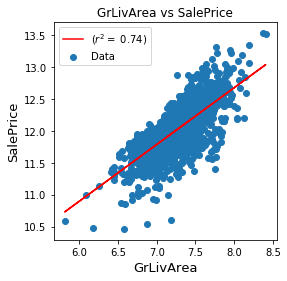

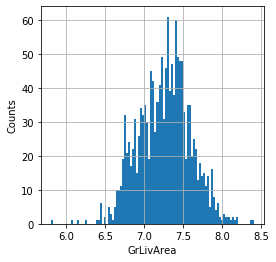

In [33]:
df_train2, Trainingdatasize = cutoffgreater(df_train2, 'GrLivArea', 4600)
df_train2['GrLivArea'] = df_train2['GrLivArea'].apply(lambda x:np.log(x))
df_test2['GrLivArea'] = df_test2['GrLivArea'].apply(lambda x:np.log(x))
plotcorr(df_train2, 'GrLivArea')

### LotArea

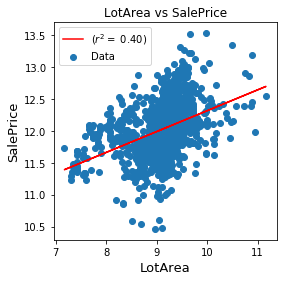

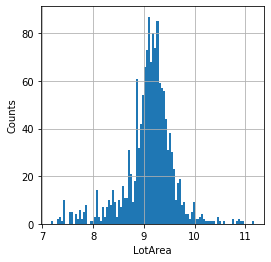

In [34]:
df_train2, Trainingdatasize = cutoffgreater(df_train2, 'LotArea', 100000)
df_train2['LotArea'] = df_train2['LotArea'].apply(lambda x:np.log(x))
df_test2['LotArea'] = df_test2['LotArea'].apply(lambda x:np.log(x))
plotcorr(df_train2, 'LotArea')

### LotFrontage

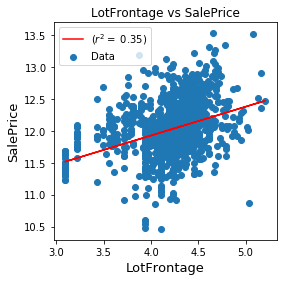

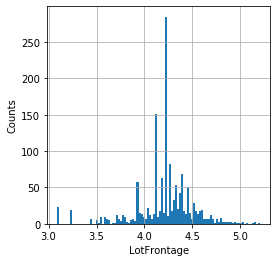

In [35]:
df_train2, Trainingdatasize = cutoffgreater(df_train2, 'LotFrontage', 300)
df_train2['LotFrontage'] = df_train2['LotFrontage'].apply(lambda x:np.log(x+1))
df_test2['LotFrontage'] = df_test2['LotFrontage'].apply(lambda x:np.log(x+1))
plotcorr(df_train2, 'LotFrontage')

### TotalBsmtSF

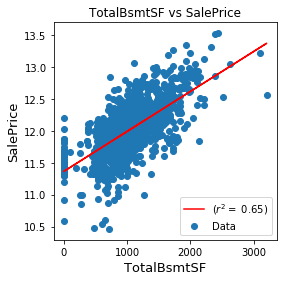

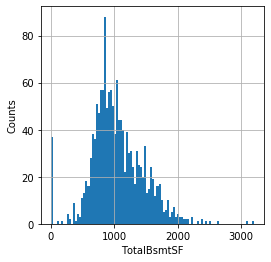

In [36]:
plotcorr(df_train2, 'TotalBsmtSF')

### Newtrainingdatasize

In [37]:
abs(df_train2.corr()['SalePrice'].sort_values(ascending = False))

SalePrice        1.000000
OverallQual      0.823083
GrLivArea        0.734984
GarageCars       0.688058
GarageArea       0.671832
TotalBsmtSF      0.645454
1stFlrSF         0.610904
FullBath         0.592804
YearBuilt        0.589333
YearRemodAdd     0.567464
TotRmsAbvGrd     0.536797
GarageYrBlt      0.505081
Fireplaces       0.487475
MasVnrArea       0.432469
LotArea          0.402157
BsmtFinSF1       0.387886
LotFrontage      0.350142
WoodDeckSF       0.335630
OpenPorchSF      0.327216
2ndFlrSF         0.325565
HalfBath         0.319836
BsmtFullBath     0.231357
BsmtUnfSF        0.221406
BedroomAbvGr     0.205949
ScreenPorch      0.123621
PoolArea         0.075200
MoSold           0.057645
3SsnPorch        0.055946
BsmtFinSF2       0.001120
BsmtHalfBath     0.007525
Id               0.013145
MiscVal          0.019940
YrSold           0.037141
LowQualFinSF     0.037528
OverallCond      0.038599
MSSubClass       0.072754
KitchenAbvGr     0.147352
EnclosedPorch    0.156914
Name: SalePr

In [38]:
df1_parsed = pd.concat([df_train2, df_test2], ignore_index=True).reset_index(drop = True)

In [39]:
abs(df1_parsed.corr()['SalePrice'].sort_values(ascending = False))

SalePrice        1.000000
OverallQual      0.567739
GrLivArea        0.529864
GarageCars       0.475524
GarageArea       0.464817
TotalBsmtSF      0.437446
1stFlrSF         0.420248
FullBath         0.415581
YearBuilt        0.414672
YearRemodAdd     0.396407
TotRmsAbvGrd     0.392485
GarageYrBlt      0.344432
Fireplaces       0.342336
MasVnrArea       0.307097
LotArea          0.280866
BsmtFinSF1       0.266119
LotFrontage      0.240481
2ndFlrSF         0.234588
WoodDeckSF       0.233306
HalfBath         0.225877
OpenPorchSF      0.224251
BsmtFullBath     0.160209
BsmtUnfSF        0.157074
BedroomAbvGr     0.144339
ScreenPorch      0.086078
PoolArea         0.059096
3SsnPorch        0.047185
MoSold           0.041920
BsmtFinSF2       0.001428
BsmtHalfBath     0.005729
MiscVal          0.012804
YrSold           0.025853
OverallCond      0.026839
LowQualFinSF     0.026882
Id               0.035829
MSSubClass       0.051154
EnclosedPorch    0.105728
KitchenAbvGr     0.106598
Name: SalePr

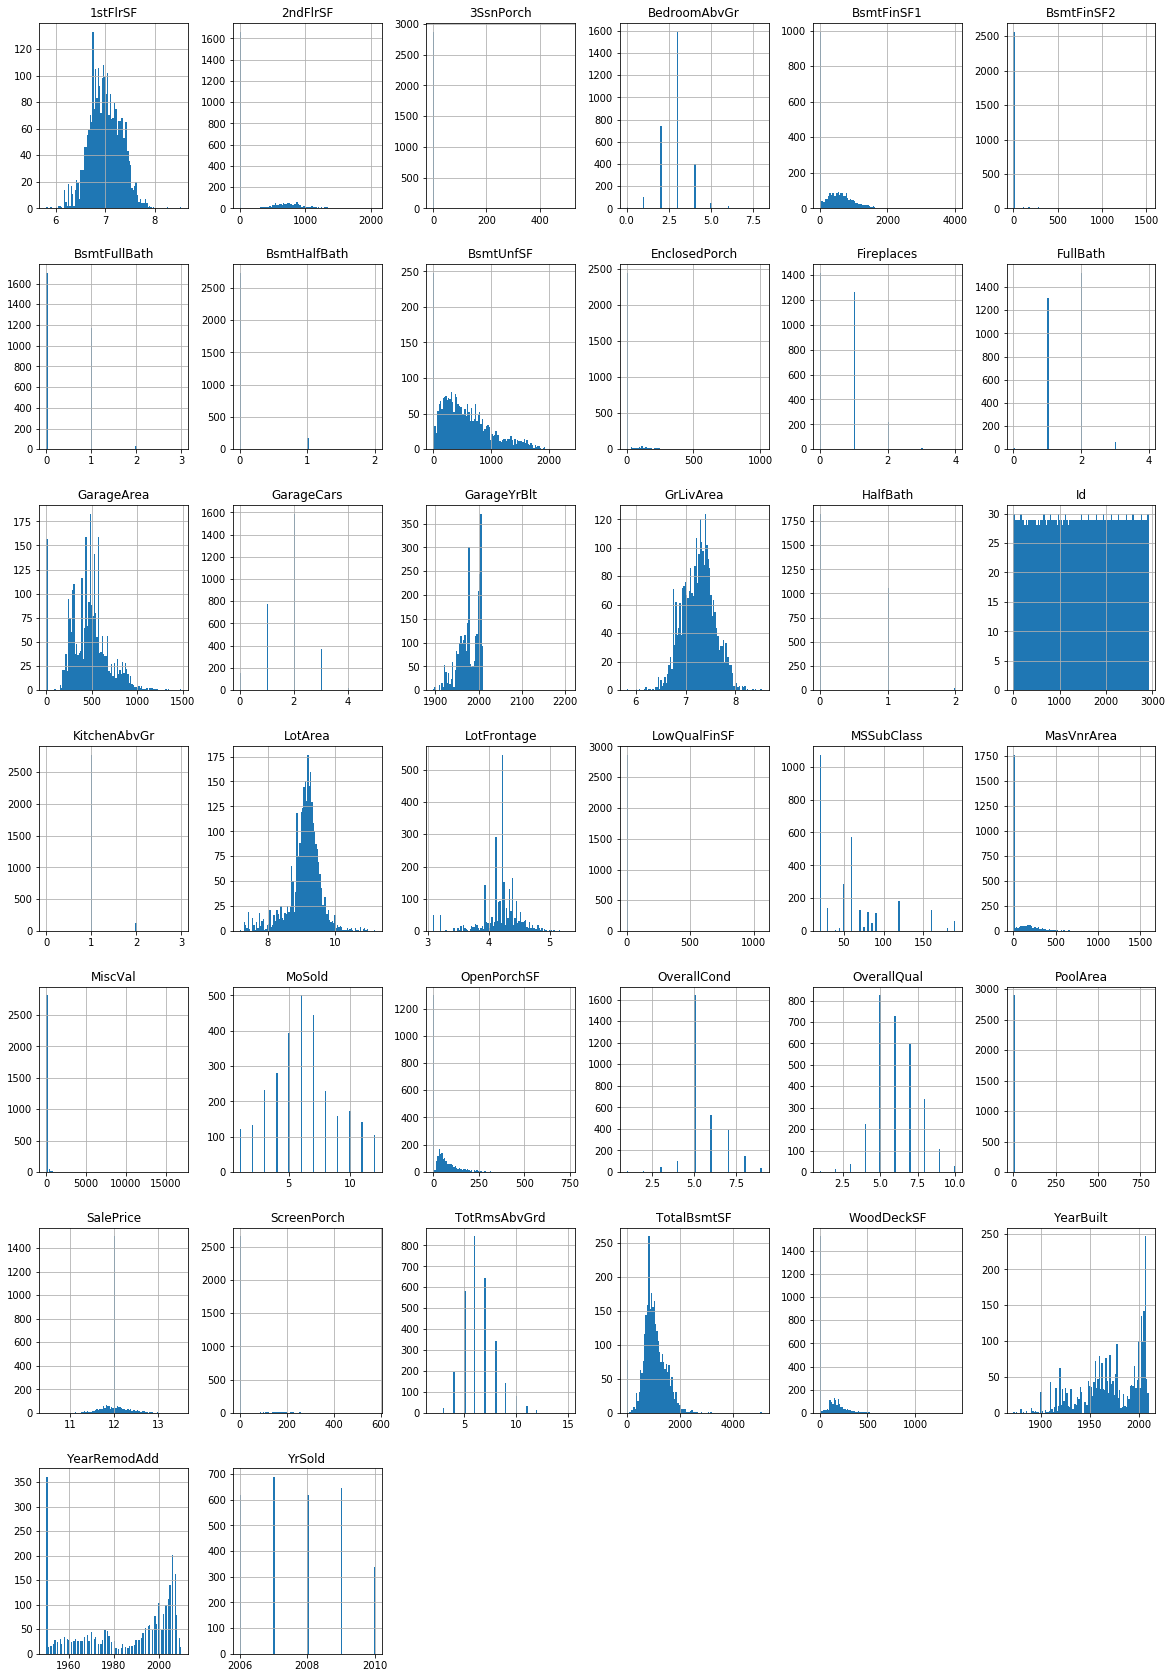

In [40]:
%matplotlib inline
df1_parsed.hist(bins=100, figsize=(20,30))
plt.show()

In [41]:
df1_parsed = df1_parsed.drop(['MiscFeature'], axis = 1)

In [42]:
df1_parsed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2908 entries, 0 to 2907
Data columns (total 80 columns):
1stFlrSF         2908 non-null float64
2ndFlrSF         2908 non-null int64
3SsnPorch        2908 non-null int64
Alley            198 non-null object
BedroomAbvGr     2908 non-null int64
BldgType         2908 non-null object
BsmtCond         2826 non-null object
BsmtExposure     2826 non-null object
BsmtFinSF1       2908 non-null float64
BsmtFinSF2       2908 non-null float64
BsmtFinType1     2829 non-null object
BsmtFinType2     2828 non-null object
BsmtFullBath     2908 non-null float64
BsmtHalfBath     2908 non-null float64
BsmtQual         2827 non-null object
BsmtUnfSF        2908 non-null float64
CentralAir       2908 non-null object
Condition1       2908 non-null object
Condition2       2908 non-null object
Electrical       2907 non-null object
EnclosedPorch    2908 non-null int64
ExterCond        2908 non-null object
ExterQual        2908 non-null object
Exterior1st      2

In [43]:
df1_parsed['Alley'] = df1_parsed['Alley'].fillna('No Alley Access')
df1_parsed['Fence'] = df1_parsed['Fence'].fillna('No Fence')
df1_parsed['BsmtCond'] = df1_parsed['BsmtCond'].fillna('No Basement')
df1_parsed['BsmtExposure'] = df1_parsed['BsmtExposure'].fillna('No Basement')
df1_parsed['BsmtFinType1'] = df1_parsed['BsmtFinType1'].fillna('No Basement')
df1_parsed['BsmtFinType2'] = df1_parsed['BsmtFinType2'].fillna('No Basement')
df1_parsed['BsmtQual'] = df1_parsed['BsmtQual'].fillna('No Basement')
df1_parsed['GarageCond'] = df1_parsed['GarageCond'].fillna('No Garage')
df1_parsed['GarageFinish'] = df1_parsed['GarageFinish'].fillna('No Garage')
df1_parsed['GarageQual'] = df1_parsed['GarageQual'].fillna('No Garage')
df1_parsed['GarageType'] = df1_parsed['GarageType'].fillna('No Garage')
df1_parsed['PoolQC'] = df1_parsed['PoolQC'].fillna('No Pool')
df1_parsed['FireplaceQu'] = df1_parsed['FireplaceQu'].fillna('No Fireplace')

In [44]:
for column in df1_parsed:
    try:
        df1_parsed[column] = df1_parsed[column].fillna(df1_parsed[column].value_counts()[0])
    except:
        pass

In [45]:
df1_parsed.isnull().sum().sum()

0

In [46]:
#Replacing MSSubClass
MSSubClassin = [20,30,40,45,50,60,70,75,80,85,90,120,150,160,180,190]
MSSubClassout = ['1-STORY 1946 & NEWER ALL STYLES', '1-STORY 1945 & OLDER', '1-STORY W/FINISHED ATTIC ALL AGES', '1-1/2 STORY - UNFINISHED ALL AGES',
            '1-1/2 STORY FINISHED ALL AGES', '2-STORY 1946 & NEWER', '2-STORY 1945 & OLDER', '2-1/2 STORY ALL AGES', 'SPLIT OR MULTI-LEVEL',
             'SPLIT FOYER', 'DUPLEX - ALL STYLES AND AGES', '1-STORY PUD (Planned Unit Development) - 1946 & NEWER', '1-1/2 STORY PUD - ALL AGES',
              '2-STORY PUD - 1946 & NEWER', 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', '2 FAMILY CONVERSION - ALL STYLES AND AGES']

In [47]:
df1_parsed.isnull().sum()

1stFlrSF        0
2ndFlrSF        0
3SsnPorch       0
Alley           0
BedroomAbvGr    0
               ..
Utilities       0
WoodDeckSF      0
YearBuilt       0
YearRemodAdd    0
YrSold          0
Length: 80, dtype: int64

In [48]:
df1_parsed['2ndFlrSF_bool'] = (df1_parsed['2ndFlrSF'] > 0) & 1
df1_parsed['3SsnPorch_bool'] = (df1_parsed['3SsnPorch'] > 0) & 1
df1_parsed['BsmtFinSF1_bool'] = (df1_parsed['BsmtFinSF1'] > 0) & 1
df1_parsed['BsmtFinSF2_bool'] = (df1_parsed['BsmtFinSF2'] > 0) & 1
df1_parsed['BsmtUnfSF_bool'] = (df1_parsed['BsmtUnfSF'] > 0) & 1
df1_parsed['EnclosedPorch_bool'] = (df1_parsed['EnclosedPorch'] > 0) & 1
df1_parsed['GarageArea_bool'] = (df1_parsed['GarageArea'] > 0) & 1
df1_parsed['MasVnrArea_bool'] = (df1_parsed['MasVnrArea'] > 0) & 1
df1_parsed['OpenPorchSF_bool'] = (df1_parsed['OpenPorchSF'] > 0) & 1
df1_parsed['ScreenPorch_bool'] = (df1_parsed['ScreenPorch'] > 0) & 1
df1_parsed['TotalBsmtSF_bool'] = (df1_parsed['TotalBsmtSF'] > 0) & 1
df1_parsed['WoodDeckSF_bool'] = (df1_parsed['WoodDeckSF'] > 0) & 1
df1_parsed['YearRemodAdd_bool'] = (df1_parsed['YearRemodAdd'] > 0) & 1
df1_parsed['LotFrontage_bool'] = (df1_parsed['LotFrontage'] > 1) & 1

In [49]:
df1_parsed = pd.get_dummies(df1_parsed, drop_first=True)

In [50]:
df1_parsed.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,6.752270,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,0,0,1,1,1,0
1,7.140453,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,0,0,1,1,1,0
2,6.824374,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,0,0,1,1,1,0
3,6.867974,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,0,0,1,1,1,0
4,7.043160,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,0,0,1,1,1,0


In [51]:
abs(df1_parsed.corr()['SalePrice'].sort_values(ascending = False))

SalePrice                   1.000000
OverallQual                 0.567739
GrLivArea                   0.529864
GarageCars                  0.475524
GarageArea                  0.464817
                              ...   
FireplaceQu_No Fireplace    0.358428
KitchenQual_TA              0.381242
ExterQual_TA                0.423672
YearRemodAdd_bool                NaN
LotFrontage_bool                 NaN
Name: SalePrice, Length: 279, dtype: float64

In [52]:
#df1_parsed = df1_parsed.drop(['Condition2_PosN', 'Functional_Sev', 'RoofStyle_Shed', 'Utilities_AllPub', 'OverallCond', 'KitchenAbvGr'], axis=1)

In [53]:
df1_parsed.drop_duplicates(keep=False,inplace=True)

In [54]:
#df1 = df1.drop('MSSubClass_1-1/2 STORY PUD - ALL AGES',axis=1)

In [55]:
new_train = df1_parsed.iloc[:Trainingdatasize]
new_test = df1_parsed.iloc[-Testdatasize:]

In [56]:
new_test.isnull().sum().sum()

0

In [57]:
new_train.isnull().sum().sum()


0

In [58]:
new_test['Id'].head(-10)

1449    1461
1450    1462
1451    1463
1452    1464
1453    1465
        ... 
2893    2905
2894    2906
2895    2907
2896    2908
2897    2909
Name: Id, Length: 1449, dtype: int64

In [59]:
new_train = new_train.drop(['Id'], axis=1)
test_id = new_test['Id']
new_test = new_test.drop(['Id'], axis=1)

In [60]:
Testdatasize

1459

In [61]:
new_test.head(-10)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
1449,6.797940,0,0,2,468.0,144.0,0.0,0.0,270.0,0,...,0,0,0,0,0,0,1,1,1,0
1450,7.192182,0,0,3,923.0,0.0,0.0,0.0,406.0,0,...,0,0,0,0,0,0,1,1,1,0
1451,6.833032,701,0,3,791.0,0.0,0.0,0.0,137.0,0,...,0,0,0,0,0,0,1,1,1,0
1452,6.830874,678,0,3,602.0,0.0,0.0,0.0,324.0,0,...,0,0,0,0,0,0,1,1,1,0
1453,7.154615,0,0,2,263.0,0.0,0.0,0.0,1017.0,0,...,0,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,7.377759,0,0,3,0.0,0.0,0.0,0.0,0.0,135,...,0,0,0,0,0,0,1,1,1,0
2894,7.221105,0,0,2,1243.0,0.0,2.0,0.0,45.0,0,...,0,0,0,0,0,0,1,1,1,0
2895,6.423247,688,0,3,0.0,0.0,0.0,0.0,264.0,0,...,0,0,0,0,0,0,1,1,1,0
2896,6.773080,0,0,3,441.0,0.0,1.0,0.0,423.0,0,...,0,0,0,0,0,0,1,1,1,0


In [62]:
Trainingdatasize

1449

In [63]:
new_test.shape

(1459, 278)

In [64]:
new_train.shape

(1449, 278)

In [65]:
new_train.head(-10)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,6.752270,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,0,0,1,1,1,0
1,7.140453,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,0,0,1,1,1,0
2,6.824374,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,0,0,1,1,1,0
3,6.867974,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,0,0,1,1,1,0
4,7.043160,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,6.816736,0,0,3,187.0,627.0,1.0,0.0,0.0,252,...,0,0,0,0,0,0,1,1,1,0
1435,7.080026,0,0,3,593.0,0.0,0.0,0.0,595.0,0,...,0,0,0,0,0,0,1,1,1,0
1436,7.106606,870,0,3,1079.0,0.0,1.0,0.0,141.0,0,...,0,0,0,0,0,0,1,1,1,0
1437,6.679599,550,0,2,0.0,0.0,0.0,0.0,560.0,0,...,0,0,0,0,0,0,1,1,1,0


In [66]:
new_train.shape

(1449, 278)

In [67]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd


def OptimalRegression(dataset, y_name):
    
    r = Ridge()
    l = Lasso()
    e = ElasticNet()
    et = ExtraTreeRegressor()
    gbr = GradientBoostingRegressor()
    ir = IsotonicRegression()
    
    x = dataset.drop(y_name,axis = 1) 
    y = dataset[y_name]
    
    x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=0)
    
    algos = [r, l, e, et, gbr]
    algo_names = ['Ridge', 'Lasso','ElasticNet','Extra Tree','Gradient Boost']
    
    result = pd.DataFrame(columns = ['Mean Squared Error', 'R2'], index = algo_names)
    
    meansquarederror = []
    r2 = []
    largest_r2 = 0
    bestmodel = 0
    
    for algo in algos:
        algo.fit(x_train,y_train)
        algo.predict(x_test)
        
        meansquarederror.append(mean_squared_error(y_test, algo.predict(x_test)))
        r2val = r2_score(y_test, algo.predict(x_test))
        r2.append(r2val)
        if(r2val > largest_r2):
            largest_r2 = r2val
            bestmodel = algo
        
    result['Mean Squared Error'] = meansquarederror
    result['R2'] = r2
    
    stats = result.sort_values('R2', ascending = False)
    
    return bestmodel, stats



In [68]:
def plot_learn_curves(model, dataset, y_name):
    
    x = dataset.drop(y_name,axis = 1) 
    y = dataset[y_name]
    
    x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=0)
    train_errors = []
    val_errors = []
    r2_val = []
    
    for i in range(1,len(x_train)):
        model.fit(x_train[:i],y_train[:i])
        y_train_predict = model.predict(x_train[:i])
        y_val_predict = model.predict(x_test)
        train_errors.append(mean_squared_error(y_train[:i], y_train_predict))
        val_errors.append(mean_squared_error(y_test, y_val_predict))

    plt.figure(figsize = (6,6))
    plt.plot(np.sqrt(train_errors), "r-", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="predict")
    plt.ylabel("RMSE", fontsize=13)
    plt.xlabel("Training Set Size", fontsize=13)
    plt.legend(['Training Set','Predicted Set'],loc='best')
    plt.yticks(np.arange(0, 1, .05)) 
    plt.grid(color='g', linestyle='-', linewidth=.1)
    

In [69]:
best_model, stats = OptimalRegression(new_train,'SalePrice')
stats

,Mean Squared Error,R2
Gradient Boost,0.013364,0.908653
Ridge,0.013779,0.905816
ElasticNet,0.030640,0.790566
Lasso,0.033559,0.770615
Extra Tree,0.042567,0.709040


In [70]:
new_test['SalePrice'] = best_model.predict(new_test.drop('SalePrice', axis=1))

In [71]:
new_test['SalePrice'] = np.exp(new_test['SalePrice'])

In [72]:
out_df = pd.concat([test_id, new_test['SalePrice']], axis=1)

In [73]:
#out_df = new_test[['Id','SalePrice']]

In [74]:
out_df.head(10)

,Id,SalePrice
1449,1461,125932.229355
1450,1462,153258.777748
1451,1463,180439.741415
1452,1464,185983.975590
1453,1465,196981.009647
1454,1466,169785.128415
1455,1467,171311.798346
1456,1468,166910.146197
1457,1469,191229.995447
1458,1470,121879.941438


In [75]:
out_df.to_csv("My_Prediction.csv",index = False)

In [76]:
ls

1533148642_test.csv
1533148642_train.csv
HackDay2.ipynb
My_Prediction.csv
README.md
data_description.txt*
house-prices-advanced-regression-techniques/
house-prices-advanced-regression-techniques.zip
sample_submission.csv*
sols/


In [77]:
out_df.shape

(1459, 2)

In [78]:
out_df.head(-10)

,Id,SalePrice
1449,1461,125932.229355
1450,1462,153258.777748
1451,1463,180439.741415
1452,1464,185983.975590
1453,1465,196981.009647
...,...,...
2893,2905,89438.289545
2894,2906,220015.161185
2895,2907,113049.217572
2896,2908,136863.505841


In [ ]:
plot_learn_curves(best_model, new_train, 'SalePrice')